# Take home exercise: training an unconditional generative model for 3D object generation


The description of the take home exercise is provided below.

## Task

The task for this take home exercise is to train (using PyTorch framework) an unconditional generative model for 3D object generation. As a part of this exercise you should:

1) <b>Train a deep network</b> which allows for an unconditional sampling of 3D models.

2) <b>Provide a simple python notebook for inference.</b> This script should load the weights of a trained network and sample 3D objects from it. Visualisations of few samples should also be included.

3) <b>Provide a brief informal report</b> (approx. 1K words) describing the approach taken, its quantitative and qualitative evaluation as well as a discussion of potential improvements if more time and compute resources were available. <br><br>

Note, code should be provided as a compressed folder containing: (a) python notebooks for training and inference scripts, (b) additional (if any) python files, (c) trained model weights and (d) a report (as a single PDF file). <br>

Both the training and inference code should run successfully on a Google Colab notebook without any explicit editing. Of course, the actual training can be performed on any compute platform of your choice.


## Objective

The main objective of this exercise is to give an opportunity for you to demonstrate: (a) your understanding of generative models in general as well as (b) generative models for 3D data, along with (c) your proficiency in training and evaluating DNNs.

## Dataset

For your experiments you should **only use the data provided** in file "shape_net_voxel_data_v1.zip". This file contains a subset of <a href='https://arxiv.org/abs/1512.03012'>ShapeNet dataset</a>. It consists of 43783 files each corresponing to a 3D object of a certain class (e.g. a car or a chair). Objects are represented as scaled and centered voxel grids. The visualisation of the contents of one of such files is provided below. <br>

<b>Note that it is up to you to choose whether you would like to use the whole or a subset (e.g. by sampling randomly or by classes) of the data provided depending on the computational resources available. </b>

In [26]:
!pip install deepdish
!pip install plyfile

In [1]:
import deepdish as dd
from matplotlib import pyplot as plt
import numpy as np
import plyfile
import os
from plyfile import PlyData, PlyElement

def save_to_ply( filename, points):
    assert points.ndim == 2 and points.shape[1] == 3, "Points should be a Nx3 array"

    vertex = np.array(
        [(p[0], p[1], p[2]) for p in points],
        dtype=[('x', 'f4'), ('y', 'f4'), ('z', 'f4')]
    )

    ply_element = PlyElement.describe(vertex, 'vertex')

    PlyData([ply_element]).write(filename)
    
def get_coords(dims):
    x = np.linspace(-1, 1, dims)
    y = np.linspace(-1, 1, dims)
    z = np.linspace(-1, 1, dims)

    x_1, y_1, z_1 = np.meshgrid(x, y,z)
    return np.stack([x_1,y_1,z_1])


def plot_single_voxel_graph(ax,coords,voxels):
  mask = voxels[:,:,:] > 0

  points = np.array([coords[0,mask],coords[1,mask],coords[2,mask]]).T
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')

  return points
    
def plot_voxels(voxels,save_ply=False):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  coords = get_coords(32)

  points =plot_single_voxel_graph(ax,coords,voxels)
  plt.show()

  if save_ply:
    save_to_ply('object.ply',points)

      
# import os
# root_dir = 'shape_net_voxel_data_v1'
# files = [f for f in os.listdir(root_dir) if (f.endswith('.dd') and f.split('_')[4] == '03001627')]
# for f in files[:16]:
#     voxel_data = dd.io.load(os.path.join(root_dir, f))
#         #'shape_net_voxel_data_v1/shape_net_voxel_data_02691156_1a04e3eab45ca15dd86060f189eb133.dd')
#         #'shape_net_voxel_data_03001627_ba7dc0bb03a57732a9d30b145d59ff.dd')
#     print(voxel_data.keys())
#     voxels = voxel_data['data']
#     print('Voxel data shape:',voxels.shape)
#     print('Voxel value (0,0,0):', voxels[0,0,0])
#     print('Voxel value (15,15,15):', voxels[15,15,15])
#     print(voxel_data['object_type'])
#     plot_voxels(voxels)

In [ ]:
# chair,03001627 car, table, aeroplane 02691156
### checking what object categories are present in dataset
root_dir = 'shape_net_voxel_data_v1'
files = [f for f in os.listdir(root_dir) if (f.endswith('.dd') and f.split('_')[4] == '02691156')]
len(files)

In [ ]:
voxel_data = dd.io.load('shape_net_voxel_data_v1/'+files[121])
#         #'shape_net_voxel_data_v1/shape_net_voxel_data_02691156_1a04e3eab45ca15dd86060f189eb133.dd')
#'shape_net_voxel_data_03001627_ba7dc0bb03a57732a9d30b145d59ff.dd')
print(voxel_data.keys())
voxels = voxel_data['data']
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])
print(voxel_data['object_type'])
plot_voxels(voxels)

In [ ]:
#### dummy code for axis of symmetry visualization
import torch
vox_up = torch.zeros((32,32,32)) 
vox_up[:,:,:16] = torch.from_numpy(voxels[:,:,:16])
vox_down = torch.zeros((32,32,32)) 
vox_down[:,:,16:] = torch.from_numpy(voxels[:,:,16:])
plot_voxels(vox_up)
plot_voxels(torch.flip(vox_down,dims=[-1]))
#plot_voxels(vox_down[:,:,::-1])

#(vox_up == vox_down[:,:,::-1]).any()

### Following are best samples from inference

min value:  -1.0
max value:  1.0
Voxel data shape: (32, 32, 32)
Voxel value (0,0,0): -0.99824375
Voxel value (15,15,15): -0.99385226


/tmp/ipykernel_3754099/1900180297.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')


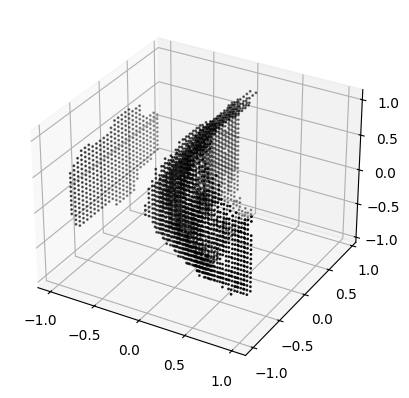

In [19]:
import torch
voxels = torch.load('3d-ddpm-chair-vpred-axis-symmetry/gen-32-ddim-final.pt')[13,0]
print("min value: ",voxels.min())
print("max value: ",voxels.max())
#voxels = voxels*2/(voxels.max()-voxels.min())
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])

plot_voxels(voxels)

min value:  -1.0
max value:  1.0
Voxel data shape: (32, 32, 32)
Voxel value (0,0,0): -0.99677104
Voxel value (15,15,15): 0.9901985


/tmp/ipykernel_3754099/1900180297.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')


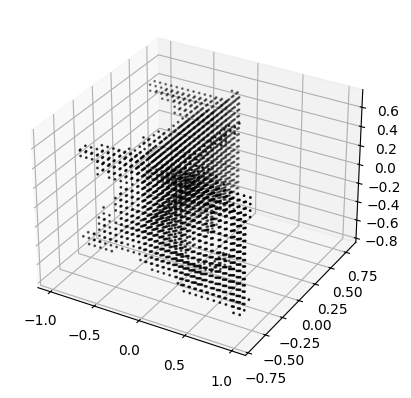

In [20]:
voxels = torch.load('3d-ddpm-chair-vpred-axis-symmetry/gen-32-ddim-final.pt')[8,0]
print("min value: ",voxels.min())
print("max value: ",voxels.max())
#voxels = voxels*2/(voxels.max()-voxels.min())
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])

plot_voxels(voxels)

min value:  -1.0
max value:  1.0
Voxel data shape: (32, 32, 32)
Voxel value (0,0,0): -0.9947524
Voxel value (15,15,15): 0.9991979


/tmp/ipykernel_3754099/1900180297.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')


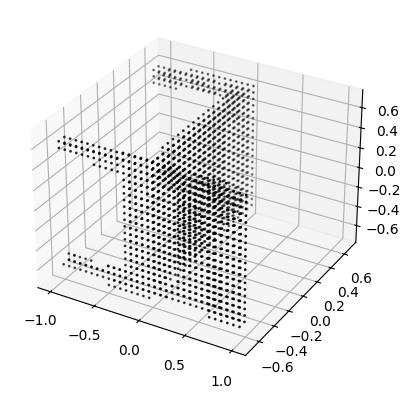

In [21]:
voxels = torch.load('3d-ddpm-chair-vpred-axis-symmetry/gen-32-ddim-final.pt')[3,0]
print("min value: ",voxels.min())
print("max value: ",voxels.max())
#voxels = voxels*2/(voxels.max()-voxels.min())
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])

plot_voxels(voxels)

### Chair and aeroplane samples

min value:  -1.0
max value:  1.0
Voxel data shape: (32, 32, 32)
Voxel value (0,0,0): -0.9962609
Voxel value (15,15,15): 0.9882065


/tmp/ipykernel_3754099/1900180297.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')


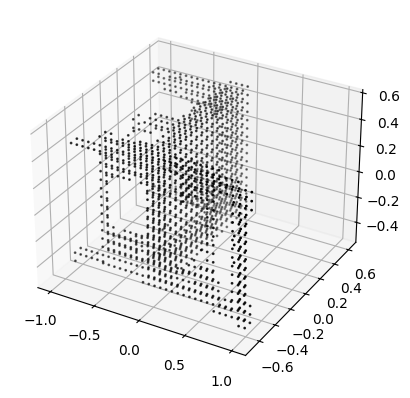

In [12]:
import torch
voxels = torch.load('3d-ddpm-chair+plane-vpred-axis-symmetry/gen-32-ddim-final.pt')[8,0]
print("min value: ",voxels.min())
print("max value: ",voxels.max())
#voxels = voxels*2/(voxels.max()-voxels.min())
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])

plot_voxels(voxels)

In [4]:
!ls

2dtrial.py
3d-ddim-32-chair
3d-ddim-32-chair-cosine-schedule
3d-ddim-32-chair-default-schedule
3d-ddim-32-chair-finetune
3d-ddim-32-chair-lr
3d-ddim-32-chair-lr-xl
3d-ddim-32-chair-noise
3d-ddim-32-chair-noise-700
3d-ddim-new-32
3d-ddim-old
3d-ddpm-chair-noise
3d-ddpm-chair-noise-SNRweight
3d-ddpm-chair-noise-SNRweight-vpred
3d-ddpm-chair+plane-vpred-axis-symmetry
3d-ddpm-chair-vpred
3d-ddpm-chair-vpred-axis-symmetry
3d-ddpm-vanilla
data
ddim_infer.py
ddpm.py
diffusers3d.py
diffusion3d.py
infer.ipynb
object.ply
__pycache__
readme.md
results
shape_net_voxel_data_03001627_ba7dc0bb03a57732a9d30b145d59ff.dd
shape_net_voxel_data_v1
shape_net_voxel_data_v1.zip
slurm-5182115.out
slurm-5187539.out
slurm-5193534.out
take_home_exercise_description.pdf
take_home_exercise.ipynb
temp
text_features.pt
try.ipynb
unet.py
wandb


min value:  -1.0
max value:  1.0
Voxel data shape: (32, 32, 32)
Voxel value (0,0,0): -0.94031966
Voxel value (15,15,15): -0.9436126


/tmp/ipykernel_1000229/1900180297.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(points[:,0],points[:,1],points[:,2],s=1,vmin=-1,vmax=1,c='k')


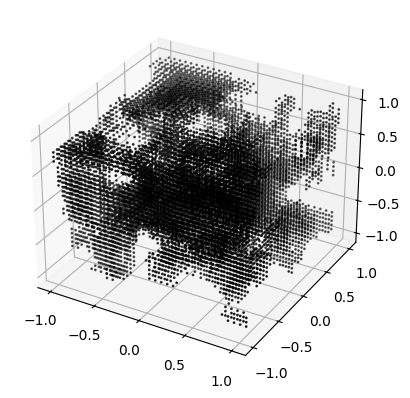

In [6]:
import torch
voxels = torch.load('3d-ddpm-vanilla/gen-32-99ep.pt')[0,0]
print("min value: ",voxels.min())
print("max value: ",voxels.max())
#voxels = voxels*2/(voxels.max()-voxels.min())
print('Voxel data shape:',voxels.shape)
print('Voxel value (0,0,0):', voxels[0,0,0])
print('Voxel value (15,15,15):', voxels[15,15,15])

plot_voxels(voxels)

## Constraints

As long as your solution satisfies the task description above you can choose any of the generative modeling approaches from the following: <br>
(a) Diffusion-based models, <br>
(b) Variational Autoencoders (VAE), <br>
(c) Autoregressive models, <br>
(d) Flow-based models. <br><br>

You can also choose to generate any of the following representations of 3D shape: <br>
(a) voxel grids, <br>
(b) point clouds, <br>
(c) meshes. <br>

## Expected duration

This excercise should take approximately 4-8 hours not including model training and report writing time. You can split your exercise over 2 weekends if needed.


## Evaluation

Your work will be reviewed in terms of the following criteria:

<b>1. Functionality and Completeness</b><br>
<ul>
<li>The code should run without errors and be complete, fulfilling all the specified tasks. <li> The model should be correctly implemented and trained on the selected dataset.</ul>

<b>2. Model Performance</b><br>

<ul><li>The generative model should produce reasonable 3D objects that can be qualitatively assessed.
<li> Use metrics such as reconstruction error, visual inspection, and any relevant quantitative measures to evaluate performance.</ul>

<b>3. Code quality</b><br>

<ul><li>Code should be well-structured, readable, and well-documented.
<li> Proper use of comments to explain the logic and flow of the implementation is expected.</ul>

<b>4. Documentation</b><br>

<ul><li> The report should be clear, concise, and well-organized, covering all aspects of the task from dataset preparation to evaluation.
<li> Visualizations and plots should be included to support the findings.</ul>

<b>5. Innovation and Creativity</b><br>

<ul><li>Demonstrating creativity in model choice, architecture modifications, or evaluation techniques is a plus.
<li> Innovative approaches taken to problem-solving and tackling challenges during the task is also a bonus.</ul>

<br><br>


<b>Good luck! We look forward to reviewing your work!</b>